In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gat
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | khamamatyurt
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kuytun
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | rungata
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | olinda
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | gboko
Processing Record 22 of Set 1 | bethel


Processing Record 32 of Set 4 | pangnirtung
Processing Record 33 of Set 4 | kaitangata
Processing Record 34 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 4 | basoko
Processing Record 36 of Set 4 | manicore
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | tera
Processing Record 39 of Set 4 | ozgon
City not found. Skipping...
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | pringsewu
Processing Record 42 of Set 4 | aitape
Processing Record 43 of Set 4 | alyangula
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | darhan
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | arkhara
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | fairbanks
Proce

Processing Record 20 of Set 8 | brejo
Processing Record 21 of Set 8 | saint-medard-en-jalles
Processing Record 22 of Set 8 | sungairaya
Processing Record 23 of Set 8 | la paz
Processing Record 24 of Set 8 | guerrero negro
Processing Record 25 of Set 8 | okhotsk
Processing Record 26 of Set 8 | morondava
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | cairns
Processing Record 29 of Set 8 | vestmannaeyjar
Processing Record 30 of Set 8 | victoria
Processing Record 31 of Set 8 | kungurtug
Processing Record 32 of Set 8 | bodden town
Processing Record 33 of Set 8 | miram shah
Processing Record 34 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 8 | kawalu
Processing Record 36 of Set 8 | samana
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | north bend
Processing Record 39 of Set 8 | pundaguitan
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | leh
Processing Record 42 of Set 8 | haibow

Processing Record 9 of Set 12 | tshikapa
Processing Record 10 of Set 12 | omsukchan
Processing Record 11 of Set 12 | eureka
Processing Record 12 of Set 12 | mikhaylov
Processing Record 13 of Set 12 | sao jose da coroa grande
Processing Record 14 of Set 12 | mount isa
Processing Record 15 of Set 12 | marawi
Processing Record 16 of Set 12 | moose factory
Processing Record 17 of Set 12 | leshukonskoye
Processing Record 18 of Set 12 | san juan
Processing Record 19 of Set 12 | isilkul
Processing Record 20 of Set 12 | foca
Processing Record 21 of Set 12 | nadym
Processing Record 22 of Set 12 | matay
Processing Record 23 of Set 12 | manoel urbano
Processing Record 24 of Set 12 | along
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | mala
Processing Record 27 of Set 12 | berlevag
Processing Record 28 of Set 12 | mandera
Processing Record 29 of Set 12 | marzuq
Processing Record 30 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 31 of Set 12 | whitian

In [7]:
len(city_data)

540

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gat,31.6100,34.7642,83.08,34,38,17.69,IL,2021-10-31 18:25:35
1,Hermanus,-34.4187,19.2345,63.90,84,96,9.84,ZA,2021-10-31 18:19:06
2,Ushuaia,-54.8000,-68.3000,56.86,41,0,0.00,AR,2021-10-31 18:19:29
3,Vaini,-21.2000,-175.2000,73.56,94,20,6.91,TO,2021-10-31 18:18:33
4,Khamamatyurt,43.6081,46.5006,50.02,89,96,10.04,RU,2021-10-31 18:25:39
5,Barrow,71.2906,-156.7887,28.42,86,90,20.71,US,2021-10-31 18:25:02
6,Bluff,-46.6000,168.3333,47.66,76,92,17.52,NZ,2021-10-31 18:20:00
7,Kuytun,54.3419,101.5036,30.38,82,98,6.96,RU,2021-10-31 18:25:42
8,Rikitea,-23.1203,-134.9692,74.16,87,93,13.40,PF,2021-10-31 18:22:18
9,Cherskiy,68.7500,161.3000,-0.60,98,100,4.94,RU,2021-10-31 18:22:56


In [11]:
new_column_order = ['City', 'Country',  'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gat,IL,2021-10-31 18:25:35,31.6100,34.7642,83.08,34,38,17.69
1,Hermanus,ZA,2021-10-31 18:19:06,-34.4187,19.2345,63.90,84,96,9.84
2,Ushuaia,AR,2021-10-31 18:19:29,-54.8000,-68.3000,56.86,41,0,0.00
3,Vaini,TO,2021-10-31 18:18:33,-21.2000,-175.2000,73.56,94,20,6.91
4,Khamamatyurt,RU,2021-10-31 18:25:39,43.6081,46.5006,50.02,89,96,10.04
5,Barrow,US,2021-10-31 18:25:02,71.2906,-156.7887,28.42,86,90,20.71
6,Bluff,NZ,2021-10-31 18:20:00,-46.6000,168.3333,47.66,76,92,17.52
7,Kuytun,RU,2021-10-31 18:25:42,54.3419,101.5036,30.38,82,98,6.96
8,Rikitea,PF,2021-10-31 18:22:18,-23.1203,-134.9692,74.16,87,93,13.40
9,Cherskiy,RU,2021-10-31 18:22:56,68.7500,161.3000,-0.60,98,100,4.94


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.time()
today

1635712468.8964236

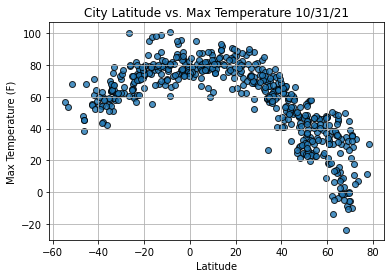

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

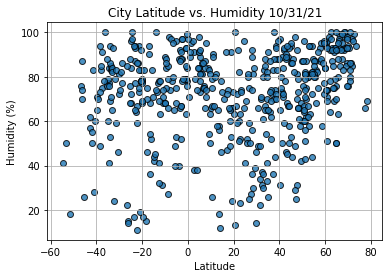

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

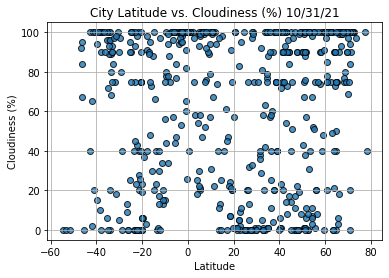

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

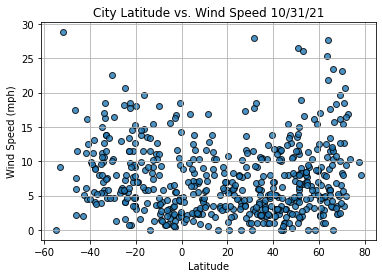

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

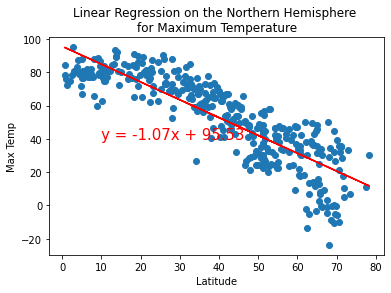

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

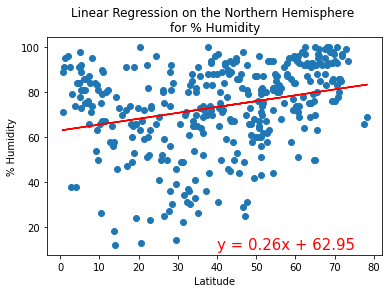

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

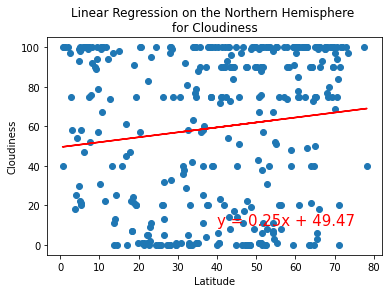

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(40,10))

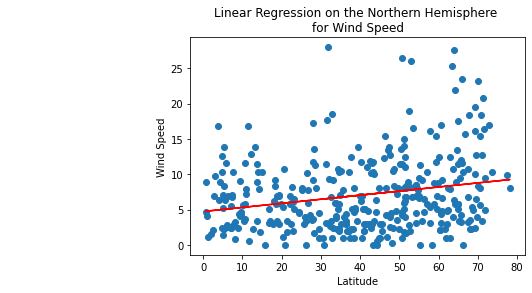

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))

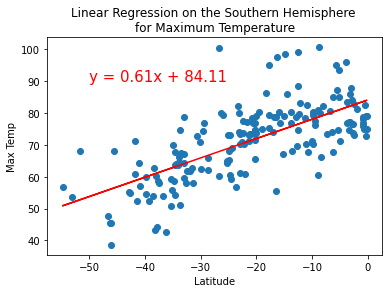

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

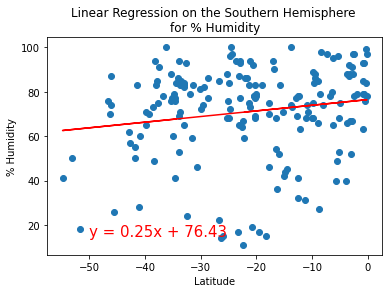

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

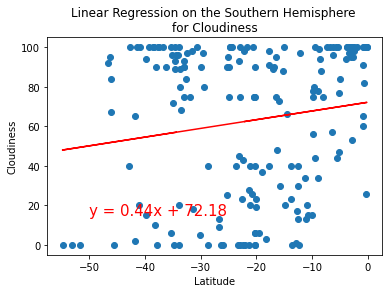

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness', 'Cloudiness',(-50,15))

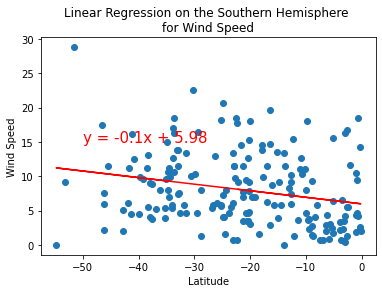

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))